In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torchsummary import summary

In [2]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [3]:

# Create training and test dataloaders

num_workers = 0
# how many samples per batch to load
batch_size = 32

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

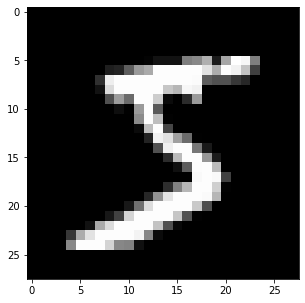

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [20]:
# # define the NN architecture
# class ConvAutoencoder(torch.nn.Module):
#     def __init__(self):
#         super(ConvAutoencoder, self).__init__()
#         # Conv - BatchNorm - Activation - DropOut - Pool
#         # 28 -> 14 # 28 -> 7
#         self.encoder1 = torch.nn.Sequential(torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1, dilation=1),
#                                             torch.nn.BatchNorm2d(16),
#                                             torch.nn.ReLU(),
#                                             torch.nn.MaxPool2d(kernel_size=2, stride=2))
#         # 14 -> 7
#         self.encoder2 = torch.nn.Sequential(torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1, dilation=1),
#                                             torch.nn.BatchNorm2d(64),
#                                             torch.nn.ReLU(),
#                                             torch.nn.MaxPool2d(kernel_size=2, stride=2))
#         # 7 -> 3
#         self.encoder3 = torch.nn.Sequential(torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=2, dilation=1),
#                                             torch.nn.BatchNorm2d(64),
#                                             torch.nn.ReLU(),
#                                             torch.nn.MaxPool2d(kernel_size=3, stride=3))
#         # 3 -> 1
#         self.encoder4 = torch.nn.Sequential(torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, dilation=1),
#                                             torch.nn.BatchNorm2d(64),
#                                             torch.nn.ReLU(),
#                                             torch.nn.MaxPool2d(kernel_size=2, stride=2))
#         # ( 28 > 14 2*) ( 14 > 7 2*) (7+2 > 3) (3 > 1)
#         ### decoder layers ###
#         # 1 -> 3
#         self.decoder4 = torch.nn.Sequential(torch.nn.ConvTranspose2d(64, 64, kernel_size=3, stride=3),
#                                             torch.nn.BatchNorm2d(64),
#                                             torch.nn.ReLU())
#         # 3 -> 7
#         self.decoder3 = torch.nn.Sequential(torch.nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2),
#                                             torch.nn.BatchNorm2d(64),
#                                             torch.nn.ReLU())
#         # 7 -> 14
#         self.decoder2 = torch.nn.Sequential(torch.nn.ConvTranspose2d(64, 16, kernel_size=2, stride=2),
#                                             torch.nn.BatchNorm2d(16),
#                                             torch.nn.ReLU())
#         # 14 -> 28
#         self.decoder1 = torch.nn.Sequential(torch.nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
#                                             torch.nn.Sigmoid())

#         # now initialize weights, appicable to first index in sequential (conv_layer): [0]
#         torch.nn.init.kaiming_uniform_(self.encoder1[0].weight)
#         torch.nn.init.kaiming_uniform_(self.encoder2[0].weight)
#         torch.nn.init.kaiming_uniform_(self.encoder3[0].weight)
#         torch.nn.init.kaiming_uniform_(self.encoder4[0].weight)
#         torch.nn.init.kaiming_uniform_(self.decoder4[0].weight)
#         torch.nn.init.kaiming_uniform_(self.decoder3[0].weight)
#         torch.nn.init.kaiming_uniform_(self.decoder2[0].weight)
#         torch.nn.init.kaiming_uniform_(self.decoder1[0].weight)

#     def forward(self, x):
#         ### encode ###
#         #print(x.shape)
#         x = self.encoder1(x)
#         #print(x.shape)
#         x = self.encoder2(x)
#         #print(x.shape)
#         x = self.encoder3(x)
#         #print(x.shape)
#         x = self.encoder4(x)
#         #print(x.shape)
        
#         ### decode ###
#         x = self.decoder4(x)
#         #print(x.shape)
#         x = self.decoder3(x)
#         #print(x.shape)
#         x = self.decoder2(x)
#         #print(x.shape)
#         x = self.decoder1(x)
#         #print(x.shape)
#         return x

#     def decode(self, x):
#         ### x expected to be 7*7*16 ###
#         ### x expected to be 1*1*10 ###
#         x = self.decoder4(x)
#         x = self.decoder3(x)
#         x = self.decoder2(x)
#         x = self.decoder1(x)
#         return x
        
#     def decode_last(self, x):
#         ### x expected to be 7*7*16 ###
#         x = self.decoder1(x)
#         return x


In [ ]:
# define the NN architecture
class ConvAutoencoder(torch.nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Conv - BatchNorm - Activation - DropOut - Pool
        # 28 -> 7
        self.encoder1co = torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.encoder1bn = torch.nn.BatchNorm2d(16)
        self.encoder1ac = torch.nn.ReLU()
        self.encoder1mp = torch.nn.MaxPool2d(kernel_size=4, stride=4, return_indices=True)
        # 7 -> 3
        self.encoder2co = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=2)
        self.encoder2bn = torch.nn.BatchNorm2d(32)
        self.encoder2ac = torch.nn.ReLU()
        self.encoder2mp = torch.nn.MaxPool2d(kernel_size=3, stride=3, return_indices=True)
        # 3 -> 1
        self.encoder3co = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.encoder3bn = torch.nn.BatchNorm2d(64)
        self.encoder3ac = torch.nn.ReLU()
        self.encoder3mp = torch.nn.MaxPool2d(kernel_size=1, stride=1, return_indices=True)
        # no need for Pooling because of dim-1

        # 1 -> 3
        self.decoder3mup = torch.nn.MaxUnpool2d(kernel_size=1, stride=1)
        self.decoder3uco = torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=0)
        self.decoder3bn = torch.nn.BatchNorm2d(32)
        self.decoder3ac = torch.nn.ReLU()

        # 3 -> 7
        self.decoder2mup = torch.nn.MaxUnpool2d(kernel_size=3, stride=3)
        self.decoder2uco = torch.nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=2)
        self.decoder2bn = torch.nn.BatchNorm2d(16)
        self.decoder2ac = torch.nn.ReLU()
        # 7 -> 28
        self.decoder1mup = torch.nn.MaxUnpool2d(kernel_size=4, stride=4)
        self.decoder1uco = torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1, padding=1)
        self.decoder1bn = torch.nn.BatchNorm2d(1)
        self.decoder1ac = torch.nn.Sigmoid()
        
        # now initialize weights
        torch.nn.init.kaiming_uniform_(self.encoder1co.weight)
        torch.nn.init.kaiming_uniform_(self.encoder2co.weight)
        torch.nn.init.kaiming_uniform_(self.encoder3co.weight)
        torch.nn.init.kaiming_uniform_(self.decoder3uco.weight)
        torch.nn.init.kaiming_uniform_(self.decoder2uco.weight)
        torch.nn.init.kaiming_uniform_(self.decoder1uco.weight)

    def forward(self, x):
        x = self.encoder1co(x)
        x = self.encoder1bn(x)
        x = self.encoder1ac(x)
        x,self.idx1 = self.encoder1mp(x)
        x = self.encoder2co(x)
        x = self.encoder2bn(x)
        x = self.encoder2ac(x)
        x,self.idx2 = self.encoder2mp(x)
        x = self.encoder3co(x)
        x = self.encoder3bn(x)
        x = self.encoder3ac(x)
        x,self.idx3 = self.encoder3mp(x)

        x = self.decoder3mup(x, self.idx3)
        x = self.decoder3uco(x)
        x = self.decoder3bn(x)
        x = self.decoder3ac(x)
        
        x = self.decoder2mup(x, self.idx2)
        x = self.decoder2uco(x)
        x = self.decoder2bn(x)
        x = self.decoder2ac(x)

        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x

    def decode(self, x):
        x = self.decoder3mup(x, self.idx3)
        x = self.decoder3uco(x)
        x = self.decoder3bn(x)
        x = self.decoder3ac(x)
        x = self.decoder2mup(x, self.idx2)
        x = self.decoder2uco(x)
        x = self.decoder2bn(x)
        x = self.decoder2ac(x)
        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x
        
    def decode_last(self, x):
        ### x expected to be 7*7*16 ###
        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x


In [96]:
torch.tensor([1,2,3,4]).cuda()

tensor([1, 2, 3, 4], device='cuda:0')

In [103]:
# define the NN architecture
class ConvAutoencoder(torch.nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Conv - BatchNorm - Activation - DropOut - Pool
        # 28 -> 7
        self.topology = [{'h':28,'features':1}, 
                         {'h':7,'features':16}, 
                         {'h':3, 'features':32}, 
                         {'h':1, 'features':64}, 
                         {'h':3, 'features':32},
                         {'h':7, 'features':16},
                         {'h':28, 'features':1}]
        self.layers = []
        in_features, out_features = self.topology[0]['features'],self.topology[1]['features']
        self.layers.append(torch.nn.Conv2d(in_features, out_features, kernel_size=3, stride=1, padding=1))  #############################
        torch.tensor([self.layers[0],self.layers[0]]).cuda()
        #self.encoder1co = torch.nn.Conv2d(1, out_features, kernel_size=3, stride=1, padding=1)
        self.encoder1bn = torch.nn.BatchNorm2d(out_features)
        self.encoder1ac = torch.nn.ReLU()
        self.encoder1mp = torch.nn.MaxPool2d(kernel_size=4, stride=4, return_indices=True)
        # 7 -> 3
        self.encoder2co = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=2)
        self.encoder2bn = torch.nn.BatchNorm2d(32)
        self.encoder2ac = torch.nn.ReLU()
        self.encoder2mp = torch.nn.MaxPool2d(kernel_size=3, stride=3, return_indices=True)
        # 3 -> 1
        self.encoder3co = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.encoder3bn = torch.nn.BatchNorm2d(64)
        self.encoder3ac = torch.nn.ReLU()
        self.encoder3mp = torch.nn.MaxPool2d(kernel_size=1, stride=1, return_indices=True)
        # no need for Pooling because of dim-1

        # 1 -> 3
        self.decoder3mup = torch.nn.MaxUnpool2d(kernel_size=1, stride=1)
        self.decoder3uco = torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=0)
        self.decoder3bn = torch.nn.BatchNorm2d(32)
        self.decoder3ac = torch.nn.ReLU()

        # 3 -> 7
        self.decoder2mup = torch.nn.MaxUnpool2d(kernel_size=3, stride=3)
        self.decoder2uco = torch.nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=2)
        self.decoder2bn = torch.nn.BatchNorm2d(16)
        self.decoder2ac = torch.nn.ReLU()
        # 7 -> 28
        self.decoder1mup = torch.nn.MaxUnpool2d(kernel_size=4, stride=4)
        self.decoder1uco = torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1, padding=1)
        self.decoder1bn = torch.nn.BatchNorm2d(1)
        self.decoder1ac = torch.nn.Sigmoid()
        
        # now initialize weights
        for layer in self.layers:
            if isinstance(layer, torch.nn.Conv2d):
                torch.nn.init.kaiming_uniform_(layer.weight)
        
        #torch.nn.init.kaiming_uniform_(self.encoder1co.weight)
        torch.nn.init.kaiming_uniform_(self.encoder2co.weight)
        torch.nn.init.kaiming_uniform_(self.encoder3co.weight)
        torch.nn.init.kaiming_uniform_(self.decoder3uco.weight)
        torch.nn.init.kaiming_uniform_(self.decoder2uco.weight)
        torch.nn.init.kaiming_uniform_(self.decoder1uco.weight)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        #x = self.encoder1co(x)
        x = self.encoder1bn(x)
        x = self.encoder1ac(x)
        x,self.idx1 = self.encoder1mp(x)
        x = self.encoder2co(x)
        x = self.encoder2bn(x)
        x = self.encoder2ac(x)
        x,self.idx2 = self.encoder2mp(x)
        x = self.encoder3co(x)
        x = self.encoder3bn(x)
        x = self.encoder3ac(x)
        x,self.idx3 = self.encoder3mp(x)

        x = self.decoder3mup(x, self.idx3)
        x = self.decoder3uco(x)
        x = self.decoder3bn(x)
        x = self.decoder3ac(x)
        
        x = self.decoder2mup(x, self.idx2)
        x = self.decoder2uco(x)
        x = self.decoder2bn(x)
        x = self.decoder2ac(x)

        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x

    def decode(self, x):
        x = self.decoder3mup(x, self.idx3)
        x = self.decoder3uco(x)
        x = self.decoder3bn(x)
        x = self.decoder3ac(x)
        x = self.decoder2mup(x, self.idx2)
        x = self.decoder2uco(x)
        x = self.decoder2bn(x)
        x = self.decoder2ac(x)
        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x
        
    def decode_last(self, x):
        ### x expected to be 7*7*16 ###
        x = self.decoder1mup(x, self.idx1)
        x = self.decoder1uco(x)
        x = self.decoder1bn(x)
        x = self.decoder1ac(x)
        return x


In [104]:
model = ConvAutoencoder()
model.cuda() # need to be set to cuda to get summary working
summary(model, (1, 28, 28))
#print(model) # 

RuntimeError: Could not infer dtype of Conv2d

In [53]:
# specify loss function
criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
### library for plot online update
from livelossplot import PlotLosses

dataloaders = {
    "train": train_loader,
    "test": test_loader
}

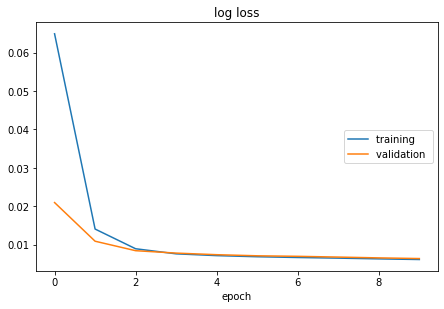

log loss
	training         	 (min:    0.006, max:    0.065, cur:    0.006)
	validation       	 (min:    0.006, max:    0.021, cur:    0.006)

[10/10]    {'log loss': 0.00611654669046402, 'val_log loss': 0.00636861240491271}

Trained.
CPU times: user 4min 21s, sys: 1.3 s, total: 4min 22s
Wall time: 4min 23s


In [55]:
%%time
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# number of epochs to train the model
n_epochs = 10
liveloss = PlotLosses()

for epoch_id, epoch in enumerate(range(1, n_epochs+1)):
    # monitor training loss
    logs = {}

    for phase in ['train', 'test']:
        running_loss = 0.0
        for data in dataloaders[phase]:
            # _ stands in for labels, here
            # no need to flatten images
            images, _ = data
            images = images.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(images)
            # calculate the loss
            loss = criterion(outputs, images)
            if phase == 'train':
                # clear the gradients of all optimized variables
                optimizer.zero_grad()
                # backward pass: compute gradient of the loss with respect to model parameters
                loss.backward()
                # perform a single optimization step (parameter update)
                optimizer.step()
            
            # update running training loss
            running_loss += loss.detach() * images.size(0)
            
        # print avg training statistics 
        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        if phase == 'test':
            prefix = 'val_' # that shit is hardcoded in PlotLosses - test called as "validation"
        if phase == 'train':
            prefix = ''     # that one too - "train" will be displayed only if label is empty
        logs[prefix + 'log loss'] = epoch_loss.item()
    liveloss.update(logs)
    liveloss.send()
    print(f"\n[{epoch_id+1}/{n_epochs}]    {logs}")
print("\nTrained.")

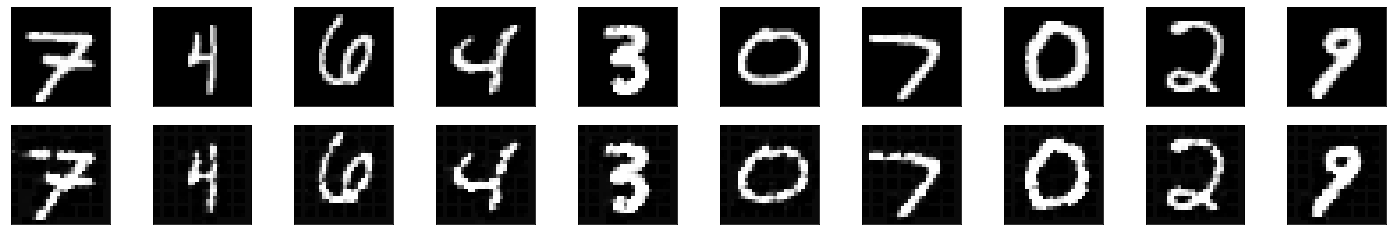

In [66]:
# obtain one batch of test images
dataiter = iter(test_loader)
dataiter.next()
dataiter.next()
images, labels = dataiter.next()
images = images.to(device)
# get sample outputs
output = model(images)
output = output.cpu()
# prep images for display
images = images.cpu()
images = images.numpy()

# output is resized into a batch of iages
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray', vmin=0, vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


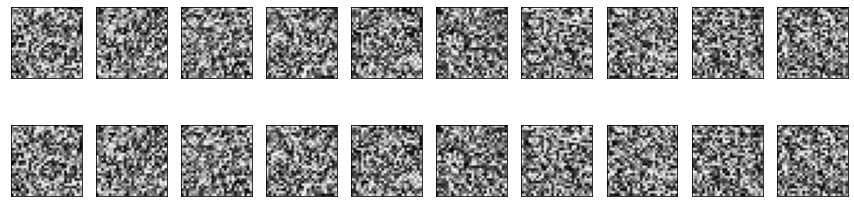

In [57]:
### random input
random_input = np.empty((10, 1, 28, 28))
for j in range(0, 10):
    random_input[j][0] = (np.random.randint(0, 100, (28*28))/100.0).reshape(28, 28)
    
output = model(torch.Tensor(random_input).to(device))
output = output.cpu()
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(15,4))

# input images on top row, reconstructions on bottom
for images, row in zip([random_input, output], axes):
    for img, ax in zip(random_input, row):
        ax.imshow(np.squeeze(img), cmap='gray', vmin=0, vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


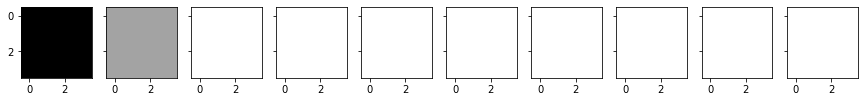

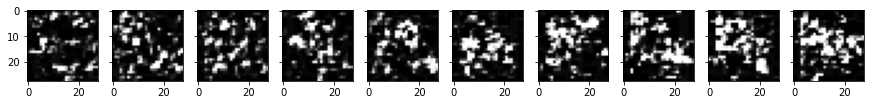

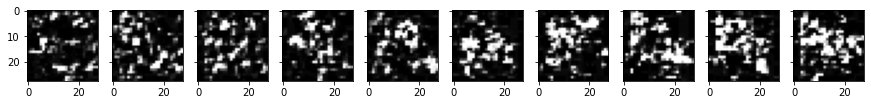

In [58]:
### "diagonal" latent layer
decode_input = np.empty((10, 64, 1, 1))
for j in range(0, 10):
    fill = (j)/10.0
    decode_input[int(j)] = np.full((64, 1, 1), fill)

output = model.decode(torch.Tensor(decode_input).to(device))
output = output.cpu()
output = output.detach().numpy()

decode_images = np.empty((10, 4, 4))
for index, j in enumerate(decode_input):
    decode_images[int(index)] = j.sum(axis=0)/10.0
    
# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(decode_images, axes):
    row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)

fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)
        
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray')

In [59]:
# ### latent: 1 of 16 dimensions filled with 1
# decode_input = np.empty((10, 16, 7, 7))
# for j in range(0, 10):
#     fill = (j)/10.0
#     decode_input[int(j)] = np.full((16, 7, 7), fill)
#     for jj in range(0, 1):
#         decode_input[int(j)][jj] = np.full((7, 7), 1)

# output = model.decode(torch.Tensor(decode_input).to(device))
# output = output.cpu()
# output = output.detach().numpy()

# decode_images = np.empty((10, 7, 7))
# for index, j in enumerate(decode_input):
#     decode_images[int(index)] = j.sum(axis=0)/16.0
    
# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(25,5))
# # input images on top row, reconstructions on bottom
# for images, row in zip(decode_images, axes):
#     row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)

# fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(25,5))
# # input images on top row, reconstructions on bottom
# for images, row in zip(output, axes):
#     row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)
        
# fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(25,5))
# # input images on top row, reconstructions on bottom
# for images, row in zip(output, axes):
#     row.imshow(np.squeeze(images), cmap='gray')

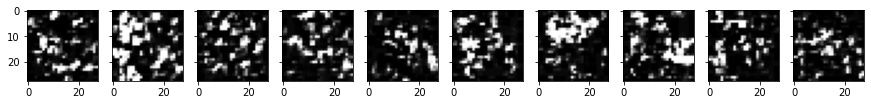

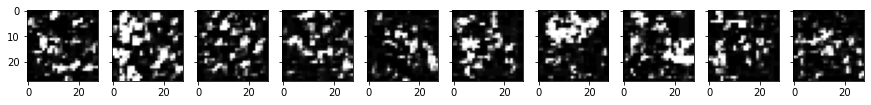

In [60]:
decode_input = np.empty((10, 64, 1, 1))
for j in range(0, 10):
    fill = 0
    decode_input[int(j)] = np.full((64, 1, 1), fill)
    decode_input[j][j][0][0] = 1.0

output = model.decode(torch.Tensor(decode_input).to(device))
output = output.cpu()
output = output.detach().numpy()

#print(decode_input.reshape(10,10))

fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)
        
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray')

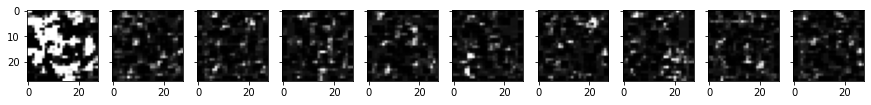

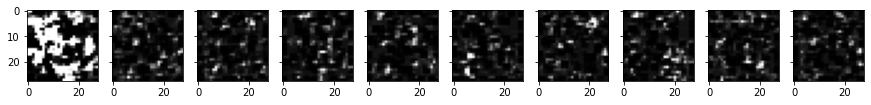

In [61]:
decode_input = np.empty((10, 64, 1, 1))
for j in range(0, 10):
    fill = 0
    decode_input[int(j)] = np.full((64, 1, 1), fill)

decode_input[0][1][0][0] = 1.0
decode_input[0][8][0][0] = 1.0
decode_input[0][9][0][0] = 1.0
    
output = model.decode(torch.Tensor(decode_input).to(device))
output = output.cpu()
output = output.detach().numpy()

#print(decode_input.reshape(10,10))

fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray', vmin=0, vmax=1)
        
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(15,5))
# input images on top row, reconstructions on bottom
for images, row in zip(output, axes):
    row.imshow(np.squeeze(images), cmap='gray')